# Narrativa Visual: El Progreso Global y las Brechas Persistentes
**Framework:** Setup – Insight – Implicación

## Contexto
Analizaremos el conjunto de datos `gapminder` para contar una historia sobre la evolución de la salud y la riqueza en el mundo desde 1952 hasta 2007. Nuestro objetivo es transformar datos crudos en un mensaje memorable y accionable.

---


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuración estética para gráficos impactantes
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'

# Cargar datos de manera robusta
file_name = 'gapminder-FiveYearData.csv'
# Intentar rutas comunes
possible_paths = [
    file_name,
    os.path.join('data', file_name),
    os.path.join('..', file_name),
    r'c:\Users\christian.vasquez\Documents\antigravity\storytelling\gapminder-FiveYearData.csv' # Ruta absoluta de respaldo
]

file_path = None
for path in possible_paths:
    if os.path.exists(path):
        file_path = path
        break

if file_path is None:
    raise FileNotFoundError(f"No se encontró el archivo '{file_name}'. Directorio actual: {os.getcwd()}")

df = pd.read_csv(file_path)

# Vista rápida
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## 1. Setup: La Brecha Abismal de 1952

Todo comienza en 1952. En este punto de partida, el mundo estaba claramente dividido en dos bloques: "Occidente" y "El Resto". Esta división definía la calidad de vida de miles de millones de personas.

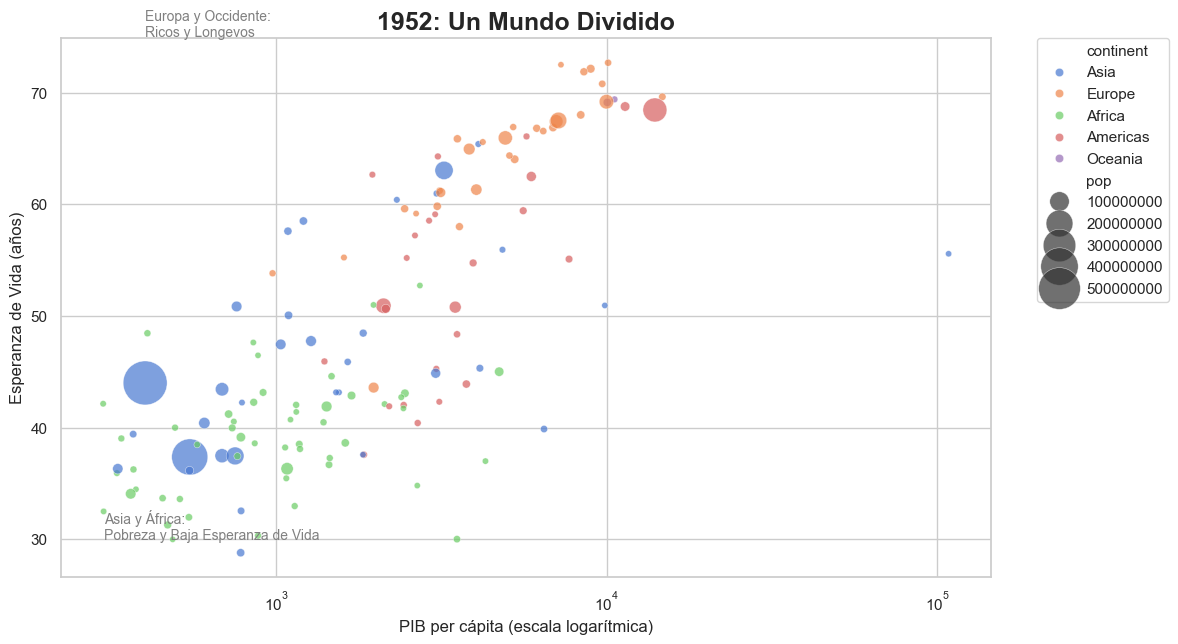

In [6]:
data_1952 = df[df['year'] == 1952]

plt.figure(figsize=(12, 7))
scatterplot = sns.scatterplot(
    data=data_1952,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    hue='continent',
    sizes=(20, 1000),
    alpha=0.7,
    palette='muted'
)

plt.xscale('log')
plt.title('1952: Un Mundo Dividido', fontsize=18, weight='bold')
plt.xlabel('PIB per cápita (escala logarítmica)', fontsize=12)
plt.ylabel('Esperanza de Vida (años)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Anotaciones para reforzar la narrativa
plt.text(400, 75, 'Europa y Occidente:\nRicos y Longevos', fontsize=10, color='grey')
plt.text(300, 30, 'Asia y África:\nPobreza y Baja Esperanza de Vida', fontsize=10, color='grey')

plt.show()

> **Contexto:** En 1952, la mayoría de los países de África y Asia tenían una esperanza de vida inferior a los 45 años y un PIB per cápita muy bajo. La correlación es clara: dinero es igual a salud en este contexto inicial.

---

## 2. Insight: El Milagro Asiático y el Rezagado Africano

Avanzamos 55 años. ¿Sigue el mundo igual de dividido? Los datos revelan un cambio dramático. Mientras algunos lograron "escapar" de la esquina inferior izquierda, otros se quedaron atrapados.

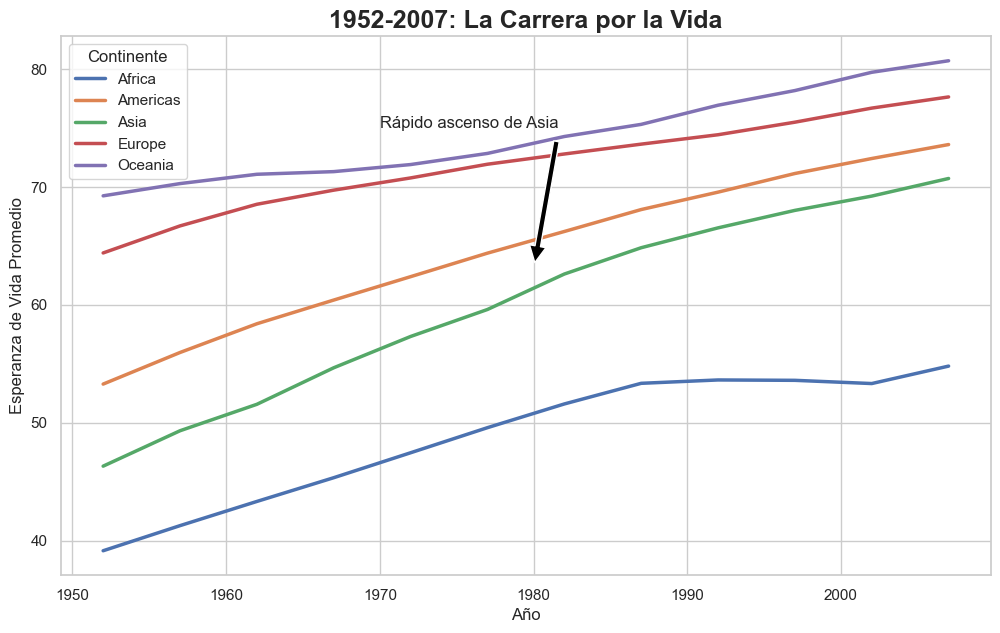

In [7]:
# Analizamos la evolución promedio por continente
evolution = df.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()

plt.figure(figsize=(12, 7))
lineplot = sns.lineplot(data=evolution, x='year', y='lifeExp', hue='continent', linewidth=2.5)

plt.title('1952-2007: La Carrera por la Vida', fontsize=18, weight='bold')
plt.ylabel('Esperanza de Vida Promedio', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.legend(title='Continente')

# Highlight Insight
plt.annotate('Rápido ascenso de Asia', xy=(1980, 63), xytext=(1970, 75),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

**Revelación:** 
1. **Convergencia:** Asia y América Latina han reducido drásticamente la brecha con Europa y Oceanía.
2. **Estancamiento:** África subsahariana muestra un crecimiento mucho más lento, e incluso un retroceso en los 90s (visible por la pendiente plana), alejándose del progreso global.

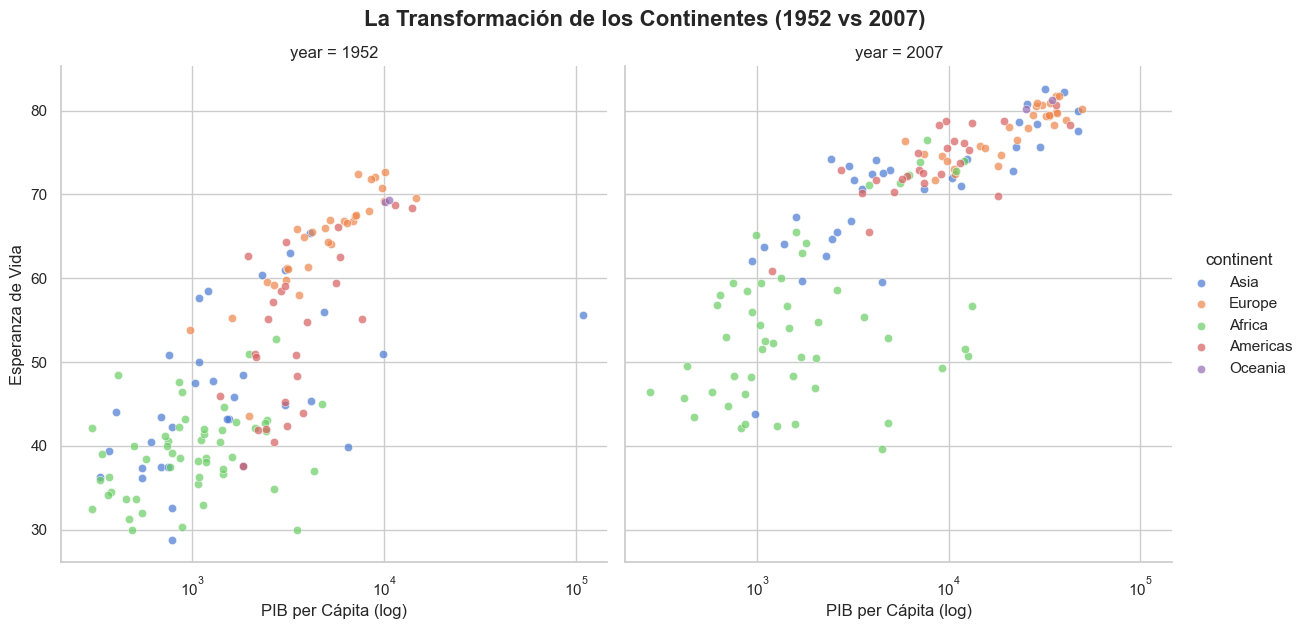

In [8]:
# Comparación visual directa: Antes vs Despues
data_subset = df[df['year'].isin([1952, 2007])]

g = sns.FacetGrid(data_subset, col="year", hue="continent", height=6, sharey=True, palette='muted')
g.map(sns.scatterplot, "gdpPercap", "lifeExp", alpha=0.7)
# FIX: Usar g.set para configurar la escala logarítmica correctamente en lugar de g.map con lambda
g.set(xscale='log')
g.add_legend()

g.fig.suptitle('La Transformación de los Continentes (1952 vs 2007)', y=1.03, fontsize=16, weight='bold')
g.set_axis_labels("PIB per Cápita (log)", "Esperanza de Vida")

plt.show()

---

## 3. Implicación: Inversión Focalizada para Cerrar la Brecha Final

La historia nos dice que el desarrollo no es imposible. Asia lo logró. La implicación para los tomadores de decisiones es clara.

Si queremos un mundo globalmente próspero, la ayuda internacional y las políticas públicas deben enfocarse en replicar el modelo de salud + educación en el continente Africano, adaptado a sus realidades. El "rebote" es posible, pero requiere catalizadores.

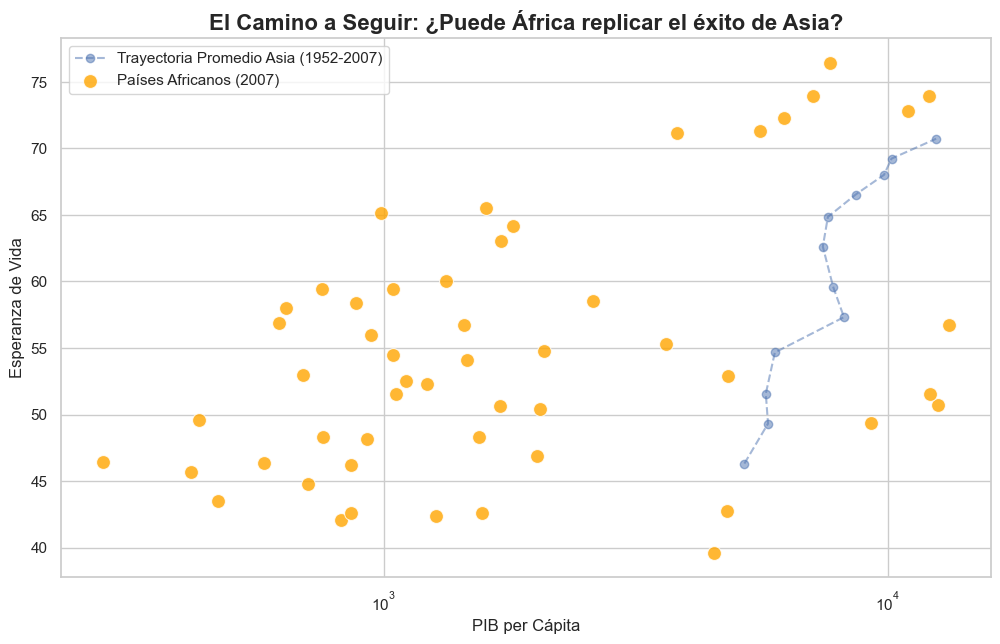

In [9]:
# Visualizando la oportunidad: Países Africanos vs el trayecto de Asia

asia_mean = df[df['continent'] == 'Asia'].groupby('year')[['gdpPercap', 'lifeExp']].mean().reset_index()
africa_2007 = df[(df['continent'] == 'Africa') & (df['year'] == 2007)]

plt.figure(figsize=(12, 7))

# Trayectoria de Asia (El camino del éxito)
plt.plot(asia_mean['gdpPercap'], asia_mean['lifeExp'], 'b--o', label='Trayectoria Promedio Asia (1952-2007)', alpha=0.5)

# Estado actual de África
sns.scatterplot(data=africa_2007, x='gdpPercap', y='lifeExp', color='orange', s=100, label='Países Africanos (2007)', alpha=0.8)

plt.xscale('log')
plt.title('El Camino a Seguir: ¿Puede África replicar el éxito de Asia?', fontsize=16, weight='bold')
plt.xlabel('PIB per Cápita')
plt.ylabel('Esperanza de Vida')
plt.legend()

plt.show()

**Conclusión Final:**

Muchos países africanos en 2007 se sitúan donde estaba Asia hace décadas (en términos de PIB y Salud). Esto no es una condena, es una **hoja de ruta**. 

> **Implicación:** No necesitamos reinventar la rueda. Las inversiones que funcionaron en Asia (vacunación, educación básica, apertura económica gradual) tienen una alta probabilidad de desbloquear el potencial latente en África y cerrar la última gran brecha global.